<a href="https://colab.research.google.com/github/srisatwik/seven7codetechnologies/blob/main/titanic_data_set_survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
td=pd.read_csv("/content/Titanic-Dataset.csv")

In [ ]:
td.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
td.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
td.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
td["Age"].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [ ]:
td["Cabin"].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [ ]:
td["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
td.replace({"Embarked":{"S":0,"C":1,"Q":2}},inplace=True)

In [ ]:
td["Embarked"].value_counts()


0.0    644
1.0    168
2.0     77
Name: Embarked, dtype: int64

In [ ]:
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0.0


In [ ]:
td.replace({"Sex":{"male":0,"female":1}},inplace=True)

In [ ]:
td["Sex"].value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [ ]:
td.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<ipython-input-50-cb2d8d081ed4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(td["Age"])


<Axes: xlabel='Age', ylabel='Density'>

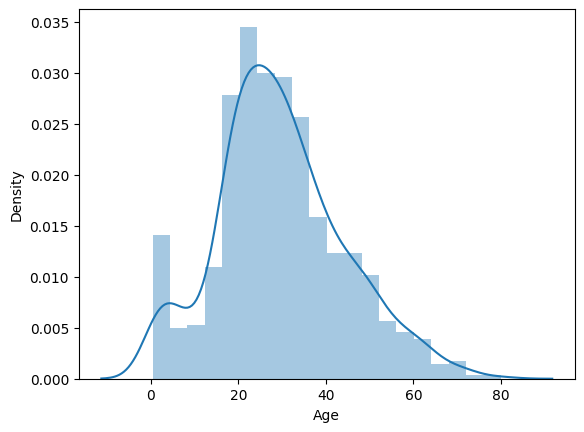

In [ ]:
sns.distplot(td["Age"])

In [ ]:
td["Age"].mean()

29.69911764705882

In [ ]:
td["Age"].fillna(td["Age"].mean(),inplace=True)

In [ ]:
td.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
td["Cabin"].fillna(method="ffill",inplace=True)

In [ ]:
td.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          1
Embarked       2
dtype: int64

In [ ]:
td["Cabin"].fillna(method="bfill",inplace=True)

In [ ]:
td["Embarked"].fillna(method="bfill",inplace=True)

In [ ]:
td.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
td.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
td["Cabin"]=le.fit_transform(td["Cabin"])

In [ ]:
x.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked
0,3,0,22.0,7.2500,81,0.0
1,1,1,38.0,71.2833,81,1.0
2,3,1,26.0,7.9250,81,0.0
3,1,1,35.0,53.1000,55,0.0
4,3,0,35.0,8.0500,55,0.0


In [ ]:
x=td.drop(columns=["Name","SibSp","Parch","Survived","Ticket","PassengerId"])
y=td["Survived"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
m1=LogisticRegression()

In [ ]:
m1.fit(x_train,y_train)

LogisticRegression()

In [ ]:
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,81,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,81,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,81,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,55,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,55,0.0


In [ ]:
prediction=m1.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
score=accuracy_score(prediction,y_test)

In [ ]:
score

0.8044692737430168

In [ ]:
x.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked
0,3,0,22.0,7.2500,81,0.0
1,1,1,38.0,71.2833,81,1.0
2,3,1,26.0,7.9250,81,0.0
3,1,1,35.0,53.1000,55,0.0
4,3,0,35.0,8.0500,55,0.0


In [ ]:
x.columns

In [ ]:
x.Fare.astype(int)

0       7
1      71
2       7
3      53
4       8
       ..
886    13
887    30
888    23
889    30
890     7
Name: Fare, Length: 891, dtype: int64

In [ ]:
td["Survived"]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

#not survived sample data to type







#survived sample data


enter the passengers class : 3
enter the passengers gender if male:0 and female:1 : 0
enter the passengers age : 22
enter the passengers Fare : 7.25
enter the passengers cabin : 81
enter the passengers Embarked id s:0 if c:1 if   Q :2 : 1
[0]
SURVIVED

In [ ]:
x.head()

In [ ]:
a=int(input("enter the passengers class : "))
b=int(input("enter the passengers gender if male:0 and female:1 : "))
c=int(input("enter the passengers age : "))
d=float(input("enter the passengers Fare : "))
e=int(input("enter the passengers cabin : "))
f=int(input("enter the passengers Embarked id s:0 if c:1 if   Q :2 : "))
features=np.array([[a,b,c,d,e,f]])
result=m1.predict(features)
print(result)
if result==0:
  print("SURVIVED")
else:
  print("not survived")

In [ ]:
#randomforest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rm=RandomForestClassifier()

In [ ]:
rm.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
p2=rm.predict(x_test)

In [ ]:
s2=accuracy_score(p2,y_test)

In [ ]:
s2

0.8379888268156425

In [ ]:
#accuracy is 83%

In [ ]:
a=int(input("enter the passengers class : "))
b=int(input("enter the passengers gender if male:0 and female:1 : "))
c=int(input("enter the passengers age : "))
d=float(input("enter the passengers Fare : "))
e=int(input("enter the passengers cabin : "))
f=int(input("enter the passengers Embarked id s:0 if c:1 if   Q :2 : "))
features=np.array([[a,b,c,d,e,f]])
result=rm.predict(features)
print(result)
if result==0:
  print("SURVIVED")
else:
  print("not survived")

enter the passengers class : 3
enter the passengers gender if male:0 and female:1 : 0
enter the passengers age : 22
enter the passengers Fare : 7
enter the passengers cabin : 81
enter the passengers Embarked id s:0 if c:1 if   Q :2 : 0
[0]
SURVIVED


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
